# SC1015 Assignment

## Table of Contents
---
1. Importing the Data
    - Why we are only using 2018 and 2019 data
    - Importing the actual data 
2. Data Cleaning
    - Date and Time
3. EDA
---
## Problem Statement
How do we predict a flight delay

### Motivation
Returning from covid

### Dataset
The dataset includes 2018 to 2020
However, only 2018 and 2019 is used as explained more in-depth
---
## Import Libraries


In [1]:
#imports
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from plotly_calplot import calplot
import seaborn as sb

pd.set_option("display.max_columns", 500)
plt.style.use('ggplot')

/Users/mythilimulani/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing the data

In [2]:
# Mount from google colab
# from google.colab import drive
# drive.mount('/content/drive')
# root = "/content/drive/MyDrive/Datasets/SC1015/"

# Personal laptops
root = "data/"

### Importing the data to be used

In [3]:
# Import the data that will actually be used
years = [2018, 2019]
dataframes = []
column_subset = ['FlightDate',
                 'Airline',
                 'Operating_Airline',
                 'Origin',
                 'Dest',
                 'Cancelled',
                 'Diverted',
                 'CRSArrTime',
                 'CRSDepTime',
                 'DepTime',
                 'ArrTime',
                 'ArrDelayMinutes',
                 'DepDelayMinutes', 
                 'OriginAirportID',
                 'OriginCityName',
                 'OriginStateName',
                 'DestAirportID',
                 'DestCityName',
                 'DestStateName',
                 'Year',
                 'Month',
                 'DayofMonth',
                 'DayOfWeek',
                ]

for year in years:
    df = pd.read_parquet(f"{root}flights_{year}.parquet", columns=column_subset)
    dataframes.append(df)
del df



flights_df = pd.concat(dataframes).reset_index(drop=True)

In [4]:
display(flights_df)

,FlightDate,Airline,Operating_Airline,Origin,Dest,Cancelled,Diverted,CRSArrTime,CRSDepTime,DepTime,ArrTime,ArrDelayMinutes,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,Year,Month,DayofMonth,DayOfWeek
0,2018-01-23,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1157.0,1256.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,1,23,2
1,2018-01-24,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1157.0,1258.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,1,24,3
2,2018-01-25,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1153.0,1302.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,1,25,4
3,2018-01-26,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1150.0,1253.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,1,26,5
4,2018-01-27,Endeavor Air Inc.,9E,ABY,ATL,False,False,1500,1400,1355.0,1459.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,1,27,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13781191,2019-01-23,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,634.0,853.0,13.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,1,23,3
13781192,2019-01-24,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,631.0,830.0,0.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,1,24,4
13781193,2019-01-25,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,632.0,828.0,0.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,1,25,5
13781194,2019-01-26,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,630.0,831.0,0.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,1,26,6


In [5]:
display(flights_df.shape)
display(flights_df.dtypes)

(13781196, 23)

FlightDate           datetime64[ns]
Airline                      object
Operating_Airline            object
Origin                       object
Dest                         object
Cancelled                      bool
Diverted                       bool
CRSArrTime                    int64
CRSDepTime                    int64
DepTime                     float64
ArrTime                     float64
ArrDelayMinutes             float64
DepDelayMinutes             float64
OriginAirportID               int64
OriginCityName               object
OriginStateName              object
DestAirportID                 int64
DestCityName                 object
DestStateName                object
Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
dtype: object

In [6]:
# Airports
airports_df = pd.read_csv(f"{root}airlines.csv")

## Data Cleaning


In [7]:
display(flights_df.columns)

Index(['FlightDate', 'Airline', 'Operating_Airline', 'Origin', 'Dest',
       'Cancelled', 'Diverted', 'CRSArrTime', 'CRSDepTime', 'DepTime',
       'ArrTime', 'ArrDelayMinutes', 'DepDelayMinutes', 'OriginAirportID',
       'OriginCityName', 'OriginStateName', 'DestAirportID', 'DestCityName',
       'DestStateName', 'Year', 'Month', 'DayofMonth', 'DayOfWeek'],
      dtype='object')

In [8]:
flights_df.describe() 

,CRSArrTime,CRSDepTime,DepTime,ArrTime,ArrDelayMinutes,DepDelayMinutes,OriginAirportID,DestAirportID,Year,Month,DayofMonth,DayOfWeek
count,1.378120e+07,1.378120e+07,1.354792e+07,1.353366e+07,1.350388e+07,1.354670e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07,1.378120e+07
mean,1.483724e+03,1.330309e+03,1.334702e+03,1.462606e+03,1.411466e+01,1.394830e+01,1.269441e+04,1.269436e+04,2.018587e+03,6.869385e+00,1.574990e+01,3.939982e+00
std,5.193956e+02,4.909026e+02,5.047816e+02,5.396836e+02,4.665277e+01,4.687052e+01,1.516753e+03,1.516743e+03,4.923456e-01,3.462741e+00,8.768915e+00,1.998046e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.013500e+04,1.013500e+04,2.018000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.100000e+03,9.150000e+02,9.160000e+02,1.047000e+03,0.000000e+00,0.000000e+00,1.129200e+04,1.129200e+04,2.018000e+03,4.000000e+00,8.000000e+00,2.000000e+00
50%,1.512000e+03,1.323000e+03,1.327000e+03,1.502000e+03,0.000000e+00,0.000000e+00,1.288900e+04,1.288900e+04,2.019000e+03,7.000000e+00,1.600000e+01,4.000000e+00
75%,1.918000e+03,1.735000e+03,1.745000e+03,1.915000e+03,8.000000e+00,7.000000e+00,1.405700e+04,1.405700e+04,2.019000e+03,1.000000e+01,2.300000e+01,6.000000e+00
max,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,2.973000e+03,2.976000e+03,1.686900e+04,1.686900e+04,2.019000e+03,1.200000e+01,3.100000e+01,7.000000e+00


In [9]:
flights_df.dtypes

FlightDate           datetime64[ns]
Airline                      object
Operating_Airline            object
Origin                       object
Dest                         object
Cancelled                      bool
Diverted                       bool
CRSArrTime                    int64
CRSDepTime                    int64
DepTime                     float64
ArrTime                     float64
ArrDelayMinutes             float64
DepDelayMinutes             float64
OriginAirportID               int64
OriginCityName               object
OriginStateName              object
DestAirportID                 int64
DestCityName                 object
DestStateName                object
Year                          int64
Month                         int64
DayofMonth                    int64
DayOfWeek                     int64
dtype: object

Changing Month and Week values from numbers to the respective names

In [10]:
dict_month = {1: "January", 2: "Febuary",3: "March",4: "April",\
              5: "May",6: "June",7: "July",8: "August",\
              9: "September",10: "October",11: "November", 12: "December"}
flights_df = flights_df.replace({'Month': dict_month})

dict_week = {1: "Monday", 2: "Tuesday",3: "Wednesday",4: "Thursday",\
              5: "Friday",6: "Saturday",7: "Sunday"}
flights_df = flights_df.replace({'DayOfWeek': dict_week})

display(flights_df)

,FlightDate,Airline,Operating_Airline,Origin,Dest,Cancelled,Diverted,CRSArrTime,CRSDepTime,DepTime,ArrTime,ArrDelayMinutes,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,Year,Month,DayofMonth,DayOfWeek
0,2018-01-23,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1157.0,1256.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,January,23,Tuesday
1,2018-01-24,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1157.0,1258.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,January,24,Wednesday
2,2018-01-25,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1153.0,1302.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,January,25,Thursday
3,2018-01-26,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1150.0,1253.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,January,26,Friday
4,2018-01-27,Endeavor Air Inc.,9E,ABY,ATL,False,False,1500,1400,1355.0,1459.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,January,27,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13781191,2019-01-23,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,634.0,853.0,13.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,January,23,Wednesday
13781192,2019-01-24,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,631.0,830.0,0.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,January,24,Thursday
13781193,2019-01-25,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,632.0,828.0,0.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,January,25,Friday
13781194,2019-01-26,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,630.0,831.0,0.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,January,26,Saturday


### Categorising appropriate columns

In [11]:
cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    flights_df[c] = flights_df[c].astype("category")

### Creating a new column to categorise flights
Defined as follows:
- Cancelled: Flights that are cancelled
    >if the Cancelled column value == 1  
- Delayed: If the arrival time is after the estimated arrival time
    >ArrDelayMinutes > 0  
- OnTime: Flights that are either early or on time
    >ArrDelayMinutes = 0 && Cancelled != 1

In [12]:
flights_df['DelaySituation'] = 'OnTime'
flights_df.loc[flights_df['Cancelled'], 'DelaySituation'] = 'Cancelled'
flights_df.loc[(flights_df['ArrDelayMinutes'] > 0) & (~flights_df['Cancelled']), 'DelaySituation'] = 'Delayed'
display(flights_df)

,FlightDate,Airline,Operating_Airline,Origin,Dest,Cancelled,Diverted,CRSArrTime,CRSDepTime,DepTime,ArrTime,ArrDelayMinutes,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,Year,Month,DayofMonth,DayOfWeek,DelaySituation
0,2018-01-23,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1157.0,1256.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,January,23,Tuesday,OnTime
1,2018-01-24,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1157.0,1258.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,January,24,Wednesday,OnTime
2,2018-01-25,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1153.0,1302.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,January,25,Thursday,OnTime
3,2018-01-26,Endeavor Air Inc.,9E,ABY,ATL,False,False,1304,1202,1150.0,1253.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,January,26,Friday,OnTime
4,2018-01-27,Endeavor Air Inc.,9E,ABY,ATL,False,False,1500,1400,1355.0,1459.0,0.0,0.0,10146,"Albany, GA",Georgia,10397,"Atlanta, GA",Georgia,2018,January,27,Saturday,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13781191,2019-01-23,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,634.0,853.0,13.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,January,23,Wednesday,Delayed
13781192,2019-01-24,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,631.0,830.0,0.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,January,24,Thursday,OnTime
13781193,2019-01-25,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,632.0,828.0,0.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,January,25,Friday,OnTime
13781194,2019-01-26,ExpressJet Airlines Inc.,EV,MEM,IAH,False,False,840,640,630.0,831.0,0.0,0.0,13244,"Memphis, TN",Tennessee,12266,"Houston, TX",Texas,2019,January,26,Saturday,OnTime


### Creating a new column to get the expected Departure and Arrival times

In [13]:
time_cols = ["ArrTime", "DepTime", "CRSArrTime", "CRSDepTime"]
for col in time_cols:
    flights_df[col] = flights_df[col].fillna(0)
    flights_df[col] = pd.to_numeric(flights_df[col], errors='coerce')
    flights_df[col] = flights_df[col].astype(int)
    flights_df[col] = flights_df[col].astype(str)

In [14]:
def combine_date_time(date_col, time_col, new_col_name):
    date_str = flights_df[date_col].astype(str)
    time_str = flights_df[time_col].astype(str)
    time_str = time_str.apply(lambda x: x.zfill(4) if len(x) < 4 else x.rjust(4, '0'))
    datetime_str = date_str + ' ' + time_str
    
    flights_df[new_col_name] = pd.to_datetime(datetime_str, format='%Y-%m-%d %H%M')


In [15]:
combine_date_time("FlightDate", "CRSDepTime", "CRSDepFlightDate")

In [16]:
flights_df.loc[:5, ["CRSDepFlightDate", "CRSDepTime", "DepTime", "DepDelayMinutes", "CRSArrTime", "ArrTime", "ArrDelayMinutes"]]

,CRSDepFlightDate,CRSDepTime,DepTime,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelayMinutes
0,2018-01-23 12:02:00,1202,1157,0.0,1304,1256,0.0
1,2018-01-24 12:02:00,1202,1157,0.0,1304,1258,0.0
2,2018-01-25 12:02:00,1202,1153,0.0,1304,1302,0.0
3,2018-01-26 12:02:00,1202,1150,0.0,1304,1253,0.0
4,2018-01-27 14:00:00,1400,1355,0.0,1500,1459,0.0
5,2018-01-28 12:02:00,1202,1202,NaN,1304,1326,22.0


### Categorising Flight Delays By Length
Based on: https://en.wikipedia.org/wiki/Flight_cancellation_and_delay
Flight delays can be categorised into 3 different categories.
- Small Delays (Up to 15 minutes)
- Medium Delays (15 - 45 minutes) 
- Large Delays (More than 45 minutes)

In [17]:
bins = [1, 15, 45, np.inf]
labels = ['SmallDelays', 'MediumDelays', 'LargeDelays']
flights_df['DelayCategory'] = pd.cut(flights_df['ArrDelayMinutes'], bins=bins, labels=labels, right=False)

### Checking how complete the dataset is


In [18]:
missing_df = flights_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights_df.shape[0]-missing_df['missing values'])/flights_df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,DelayCategory,9033637,34.449543
1,ArrDelayMinutes,277313,97.987744
2,DepDelayMinutes,234493,98.298457
3,Origin,0,100.000000
4,DelaySituation,0,100.000000
5,DayOfWeek,0,100.000000
6,DayofMonth,0,100.000000
7,Month,0,100.000000
8,Year,0,100.000000
9,DestStateName,0,100.000000


## EDA

### Which airline has the most delays

In [19]:
flights_df['Airline'].value_counts()

Southwest Airlines Co.                       2716498
Delta Air Lines Inc.                         1453704
SkyWest Airlines Inc.                        1368547
American Airlines Inc.                       1331959
United Air Lines Inc.                        1247475
JetBlue Airways                               602421
Republic Airlines                             533125
Envoy Air                                     454834
Alaska Airlines Inc.                          449568
Comair Inc.                                   406121
Mesa Airlines Inc.                            381528
Spirit Air Lines                              381023
Endeavor Air Inc.                             377276
ExpressJet Airlines Inc.                      301457
Frontier Airlines Inc.                        255578
Horizon Air                                   207142
Air Wisconsin Airlines Corp                   205657
Allegiant Air                                 201526
Hawaiian Airlines Inc.                        

Creating a dataframe of the airlines and sorting the number of delayed, ontime and cancelled flights.  
then dividing those numbers by number of total flights per airline and multplying by 100 so as to get percentages

In [20]:
flights_df['Airline'] = flights_df['Airline'].astype('category')
airline_df = flights_df.groupby('Airline')['DelaySituation'].value_counts().unstack()


total_flights = airline_df.sum(axis=1)
print(type(total_flights))
for value in airline_df.columns:
    airline_df[value] = (airline_df[value] / total_flights)*100

total_flights = total_flights.sort_values(ascending=False).index
display(airline_df)


<class 'pandas.core.series.Series'>


DelaySituation,Cancelled,Delayed,OnTime
Airline,,,
Air Wisconsin Airlines Corp,3.270008,31.082822,65.647170
Alaska Airlines Inc.,1.041222,34.724224,64.234554
Allegiant Air,0.691226,38.062086,61.246688
American Airlines Inc.,1.920630,37.410911,60.668459
Cape Air,0.120409,26.189043,73.690548
Capital Cargo International,4.281944,33.003570,62.714485
Comair Inc.,2.484727,35.077477,62.437796
"Commutair Aka Champlain Enterprises, Inc.",5.162075,45.074579,49.763346
Compass Airlines,0.570065,33.693488,65.736447


In [21]:
airline_df.loc[total_flights].sort_values('OnTime', ascending=False)\
[['OnTime','Delayed','Cancelled']]\
.style.background_gradient(axis=0,cmap='YlOrRd')

DelaySituation,OnTime,Delayed,Cancelled
Airline,,,
Cape Air,73.690548,26.189043,0.120409
Delta Air Lines Inc.,71.868620,27.856703,0.274678
Endeavor Air Inc.,70.240355,28.047371,1.712274
Spirit Air Lines,66.377620,32.224301,1.398078
Hawaiian Airlines Inc.,66.332765,33.436348,0.230888
"GoJet Airlines, LLC d/b/a United Express",66.257953,32.084511,1.657536
Compass Airlines,65.736447,33.693488,0.570065
Air Wisconsin Airlines Corp,65.647170,31.082822,3.270008
SkyWest Airlines Inc.,65.457525,32.708705,1.833770


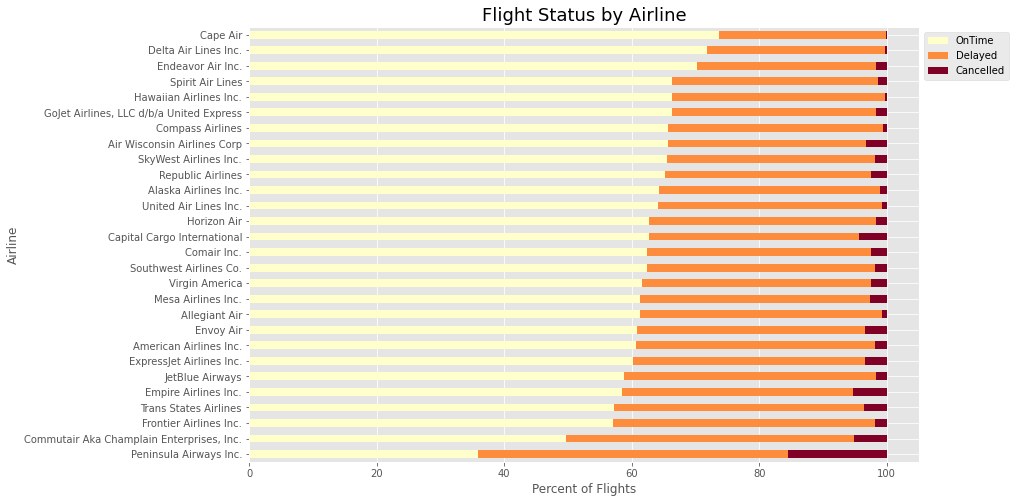

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
airline_df.sort_values('OnTime')[['OnTime','Delayed','Cancelled']].plot(kind='barh', stacked=True, ax=ax, cmap='YlOrRd')
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('Flight Status by Airline', fontsize=18)
ax.set_xlabel('Percent of Flights')
plt.show()

### Taking a look at the delay time categories

We'll start by plotting for the frequency of delays in those categories

In [23]:
flights_df['DelayCategory'].value_counts()

SmallDelays     2131762
MediumDelays    1415243
LargeDelays     1200554
Name: DelayCategory, dtype: int64

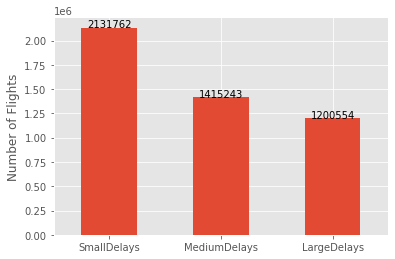

In [24]:
category_counts = flights_df['DelayCategory'].value_counts()

ax = category_counts.plot(kind='bar')
ax.set_xticklabels(labels, rotation=0)
ax.set_ylabel('Number of Flights')

for i, v in enumerate(category_counts):
    ax.text(i, v + 1000, str(v), ha='center')

plt.show()

### Flights Categorised by Time
#### By Year

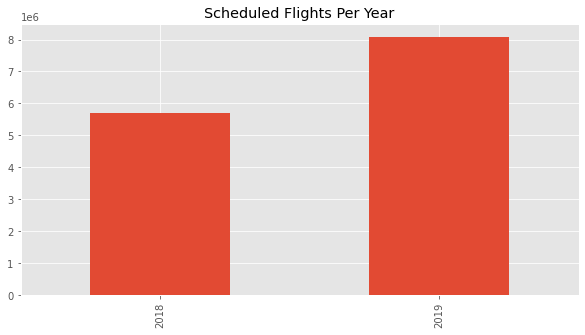

In [25]:
flights_df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year")
    
plt.show()

#### By Month

In [26]:
df_agg = (
    flights_df.groupby("Month")["DelayCategory"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["SmallDelays", "MediumDelays", "LargeDelays"]
df_agg[col_order].style.background_gradient(cmap="YlOrRd")

DelayCategory,SmallDelays,MediumDelays,LargeDelays
Month,,,
April,45.963535,29.280486,24.755978
August,41.166109,29.228066,29.605824
December,45.470761,30.915741,23.613498
Febuary,42.165823,31.914347,25.919830
January,44.795642,30.227801,24.976557
July,41.668324,29.149344,29.182332
June,40.473181,29.766865,29.759953
March,48.209719,29.883797,21.906484
May,43.553317,29.446820,26.999863


In [27]:
month_df = flights_df.groupby('Month')['DelaySituation'].value_counts().unstack()
month_df.describe()
display(month_df)
total_flights = month_df.sum(axis=1)
print(type(total_flights))
for value in month_df.columns:
    month_df[value] = (month_df[value] / total_flights)*100

total_flights = total_flights.sort_values(ascending=False).index

month_df.loc[total_flights].sort_values('Delayed', ascending=False) \
    [['Delayed', 'OnTime','Cancelled']] \
    .style.background_gradient(axis=0,cmap='YlOrRd')

DelaySituation,Cancelled,Delayed,OnTime
Month,,,
April,20504,378450,752288
August,24572,451347,745149
December,14979,477100,837187
Febuary,23501,323212,504358
January,32240,352983,711114
July,21023,397117,666765
June,18973,405088,588121
March,22501,342935,669917
May,18496,372013,653846


<class 'pandas.core.series.Series'>


DelaySituation,Delayed,OnTime,Cancelled
Month,,,
June,40.021261,58.104274,1.874465
Febuary,37.977090,59.261566,2.761344
August,36.963298,61.024366,2.012337
July,36.603850,61.458377,1.937773
December,35.891989,62.981149,1.126862
May,35.621317,62.607638,1.771045
March,33.122520,64.704212,2.173268
November,32.876604,66.093302,1.030094
April,32.873193,65.345774,1.781033


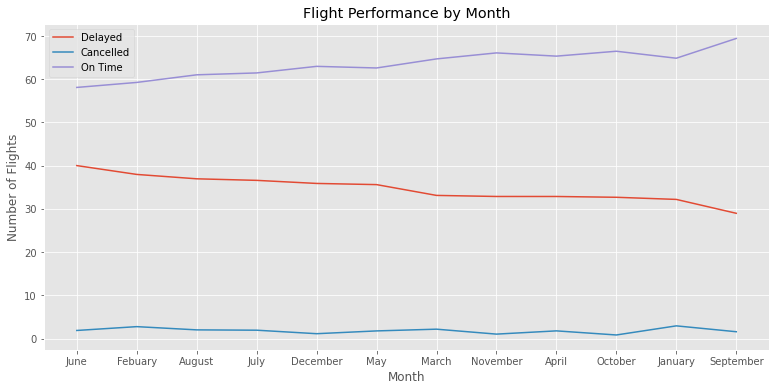

In [39]:
plt.figure(figsize=(13, 6))
custom_palette = ['#942f4d', '#f99e5d', '#f9f9d0']
month_df = month_df.sort_values(by='Delayed', ascending=False)
# plot the data
plt.plot(month_df.index, month_df['Delayed'], label='Delayed')
plt.plot(month_df.index, month_df['Cancelled'], label='Cancelled')
plt.plot(month_df.index, month_df['OnTime'], label='On Time')
plt.plot(color=custom_palette)
# add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Flight Performance by Month')
plt.legend()

/var/folders/rw/hx2p35lj2fb3nx3xpvyr3b940000gn/T/ipykernel_34844/90097021.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])


<Figure size 720x432 with 0 Axes>

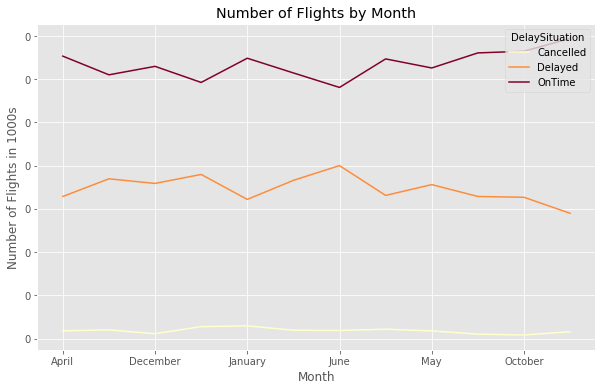

In [29]:
plt.figure(figsize=(10, 6))

custom_palette = ['#942f4d', '#f99e5d', '#f9f9d0']
ax = month_df.plot(kind='line', cmap='YlOrRd', figsize=(10, 6))
ax.set_title('Number of Flights by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Flights in 1000s')
ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])

plt.show()


#### By week

In [30]:
week_df = flights_df.groupby('DayOfWeek')['DelaySituation'].value_counts().unstack()
week_df.describe()
total_flights = week_df.sum(axis=1)
print(type(total_flights))
for value in week_df.columns:
    week_df[value] = (week_df[value] / total_flights)*100

total_flights = total_flights.sort_values(ascending=False).index

week_df.loc[total_flights].sort_values('Delayed', ascending=False) \
    [['Delayed', 'OnTime','Cancelled']] \
    .style.background_gradient(axis=0,cmap='YlOrRd')

<class 'pandas.core.series.Series'>


DelaySituation,Delayed,OnTime,Cancelled
DayOfWeek,,,
Friday,37.083462,61.397049,1.519489
Thursday,36.894841,61.166572,1.938587
Monday,35.135691,63.063435,1.800874
Sunday,33.819234,64.485139,1.695626
Wednesday,33.653656,64.266631,2.079712
Tuesday,33.043262,65.154231,1.802506
Saturday,30.818807,67.779183,1.402010


/var/folders/rw/hx2p35lj2fb3nx3xpvyr3b940000gn/T/ipykernel_34844/747234852.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])


<Figure size 720x432 with 0 Axes>

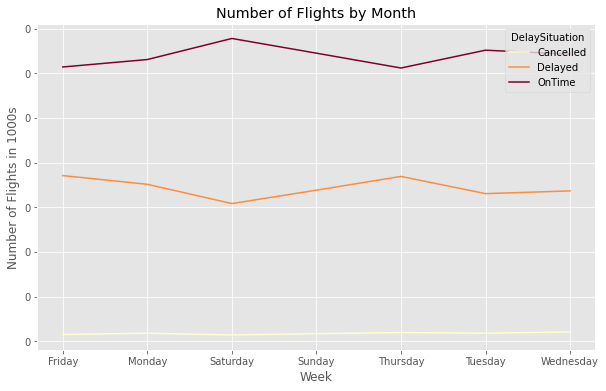

In [31]:
plt.figure(figsize=(10, 6))


ax = week_df.plot(kind='line', cmap='YlOrRd', figsize=(10, 6))
ax.set_title('Number of Flights by Month')
ax.set_xlabel('Week')
ax.set_ylabel('Number of Flights in 1000s')
ax.set_yticklabels(['{:,}'.format(int(x/1000)) for x in ax.get_yticks()])

plt.show()


In [32]:
DestAirports_df = flights_df.groupby('DestCityName')['DelaySituation'].value_counts().unstack()
DestAirports_df.describe()
total_flights = DestAirports_df.sum(axis=1)
print(type(total_flights))
for value in DestAirports_df.columns:
    DestAirports_df[value] = (DestAirports_df[value] / total_flights)*100

total_flights = total_flights.sort_values(ascending=False).index
display(DestAirports_df)

DestAirports_df.loc[total_flights].sort_values('Delayed', ascending=False) \
    [['Delayed', 'OnTime','Cancelled']] \
    .style.background_gradient(axis=0,cmap='YlOrRd')

<class 'pandas.core.series.Series'>


DelaySituation,Cancelled,Delayed,OnTime
DestCityName,,,
"Aberdeen, SD",2.292769,21.164021,76.543210
"Abilene, TX",1.685751,38.326972,59.987277
"Adak Island, AK",4.395604,19.780220,75.824176
"Aguadilla, PR",0.843091,46.791569,52.365340
"Akron, OH",3.122626,38.831485,58.045890
...,...,...,...
"Wrangell, AK",1.338583,38.897638,59.763780
"Yakima, WA",2.976996,39.467749,57.555255
"Yakutat, AK",0.947867,31.911532,67.140600


DelaySituation,Delayed,OnTime,Cancelled
DestCityName,,,
"Youngstown/Warren, OH",100.000000,nan,nan
"Unalaska, AK",63.263839,22.645579,14.090582
"Pago Pago, TT",57.851240,42.148760,nan
"Ponce, PR",48.331273,50.494438,1.174289
"Aguadilla, PR",46.791569,52.365340,0.843091
"North Bend/Coos Bay, OR",44.164456,52.122016,3.713528
"Gunnison, CO",43.754131,52.875083,3.370787
"Sanford, FL",43.622612,55.532636,0.844752
"Sioux City, IA",43.427971,53.259727,3.312303


The map plot for delay by state, iterated through month

In [33]:
months = {'January', 'Febuary', 'March', 'April', 'May', 'June',\
          'July', 'August', 'September', 'October', 'November', 'December'}

trynew = flights_df.drop(['FlightDate', 
                          'Airline',
                 'Operating_Airline',
                 'Origin',
                 'Dest',
                 'Cancelled',
                 'Diverted',
                 'CRSArrTime',
                 'CRSDepTime',
                 'CRSDepFlightDate',
                 'DepTime',
                 'ArrTime',
                 'ArrDelayMinutes',
                 'DepDelayMinutes', 
                 'OriginAirportID',
                 'OriginCityName',
                 'DestAirportID',
                 'DestCityName',
                 'Year',
                 'DayofMonth',
                 'DelayCategory',
                 'DayOfWeek'
                ], axis =1)


display(trynew)
state_df = (trynew.groupby('OriginStateName')[['DelaySituation', 'Month', 'DestStateName']].value_counts().unstack()).query('DelaySituation == "Delayed"')
#state_df = (flights_df.groupby('OriginStateName').value_counts().unstack()).query('DelaySituation == "Delayed"')

total_flights = state_df.sum(axis=1)
display(state_df)

#statejan_df= state_df.groupby('Month').value_counts().unstack()
#display(statejan_df)

,OriginStateName,DestStateName,Month,DelaySituation
0,Georgia,Georgia,January,OnTime
1,Georgia,Georgia,January,OnTime
2,Georgia,Georgia,January,OnTime
3,Georgia,Georgia,January,OnTime
4,Georgia,Georgia,January,OnTime
...,...,...,...,...
13781191,Tennessee,Texas,January,Delayed
13781192,Tennessee,Texas,January,OnTime
13781193,Tennessee,Texas,January,OnTime
13781194,Tennessee,Texas,January,OnTime


DestStateName                             Alabama  Alaska  Arizona  Arkansas  \
OriginStateName DelaySituation Month                                           
Alabama         Delayed        April            0       0        0         0   
                               August           0       0        0         0   
                               December         0       0        0         0   
                               Febuary          0       0        0         0   
                               January          0       0        0         0   
...                                           ...     ...      ...       ...   
Wyoming         Delayed        March            0       0        0         0   
                               May              0       0        0         0   
                               November         0       0        0         0   
                               October          0       0        0         0   
                               September        0       0        0         0   

DestStateName                             California  Colorado  Connecticut  \
OriginStateName DelaySituation Month                                          
Alabama         Delayed        April               0        54            0   
                               August              0       116            0   
                               December            0        83            0   
                               Febuary             0        61            0   
                               January             3        70            0   
...                                              ...       ...          ...   
Wyoming         Delayed        March              71       290            0   
                               May                 0       265            0   
                               November            0       269            0   
                               October             0       351            0   
                               September           6       249            0   

DestStateName                             Florida  Georgia  Hawaii  Idaho  \
OriginStateName DelaySituation Month                                        
Alabama         Delayed        April          112      523       0      0   
                               August         119      257       0      0   
                               December       186      584       0      0   
                               Febuary        104      286       0      0   
                               January        103      573       0      0   
...                                           ...      ...     ...    ...   
Wyoming         Delayed        March            0        3       0      0   
                               May              0        0       0      0   
                               November         0        0       0      0   
                               October          0        0       0      0   
                               September        0        0       0      0   

DestStateName                             Illinois  Indiana  Iowa  Kansas  \
OriginStateName DelaySituation Month                                        
Alabama         Delayed        April           148        0     0       0   
                               August          270        0     0       0   
                               December        249        0     0       0   
                               Febuary         174        0     0       0   
                               January         197        0     0       0   
...                                            ...      ...   ...     ...   
Wyoming         Delayed        March            27        0     0       0   
                               May               0        0     0       0   
                               November          0        0     0       0   
                               October          10        0     0       0   
     

In [34]:
#statesjan = state_df['OriginStateName']
#print(type(statesjan))

In [35]:
import plotly.express as px

In [36]:
fig = px.choropleth(state_df['January'], locations='OriginStateName', locationmode='USA-states',
                    scope='usa', color='Delayed',
                    color_continuous_scale='Oranges',
                    hover_data=['Delayed', 'OnTime', 'Cancelled'])

KeyError: 'January'